<a href="https://colab.research.google.com/github/porselvi15/Abinaya/blob/main/Phase3_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔼 Please upload your CSV file (e.g., Accident_Information.csv)...


Saving RTA Dataset.csv to RTA Dataset (1).csv
✅ File 'RTA Dataset (1).csv' loaded successfully.

📊 Dataset Preview:
Shape: (12316, 32)
Columns: ['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Number_of_vehicles_involved', 'Number_of_casualties', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury



📈 Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.03      0.04        62
           1       0.22      0.39      0.28        84
           2       0.00      0.00      0.00         8
           3       0.10      0.13      0.12        53
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        14
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        56
          10       0.18      0.38      0.24       123
          11       0.17      0.03      0.05        32
          12       0.08      0.04      0.05        52
          13       0.00      0.00      0.00        21
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00        24
          17       0.00      0.00      0.00         7
 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-3-2b0c605aec49>:76: UserWarning: G

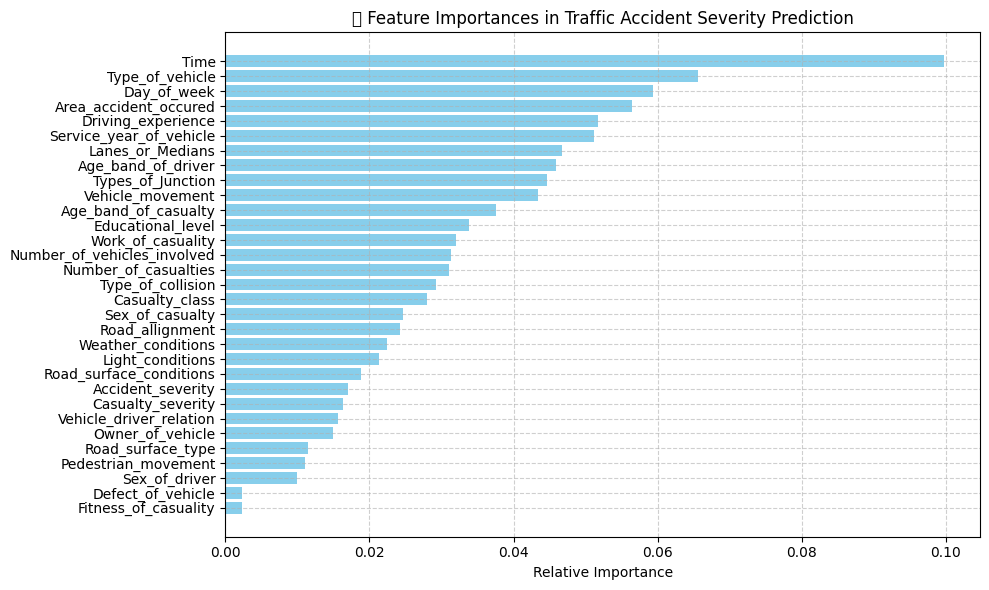

In [ ]:
# ✅ STEP 1: Install necessary libraries
!pip install pandas scikit-learn matplotlib seaborn

# ✅ STEP 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
import io

# ✅ STEP 3: Upload your accident dataset CSV file
print("🔼 Please upload your CSV file (e.g., Accident_Information.csv)...")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))
print(f"✅ File '{filename}' loaded successfully.")

# ✅ STEP 4: Inspect dataset
print("\n📊 Dataset Preview:")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())

# ✅ STEP 5: Clean dataset
# Drop columns with too many missing values (optional)
df = df.dropna()
# Drop non-numeric or datetime-heavy columns (adjust based on dataset)
df = df.select_dtypes(include=['object', 'int64', 'float64'])

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# ✅ STEP 6: Define features and target
# CHANGE target_column if your dataset uses a different name
target_column = "Cause_of_accident"
if target_column not in df.columns:
    raise ValueError(f"Column '{target_column}' not found. Please update 'target_column' in the code.")

X = df.drop(target_column, axis=1)
y = df[target_column]

# ✅ STEP 7: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ STEP 8: Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ✅ STEP 9: Predict & evaluate
y_pred = model.predict(X_test)

print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ✅ STEP 10: Visualize feature importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('🚦 Feature Importances in Traffic Accident Severity Prediction')
plt.barh(range(len(indices)), importances[indices], align='center', color='skyblue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

